In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from wordcloud import WordCloud

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = '/content/drive/My Drive/Datasets/netflix.csv'
data = pd.read_csv(file_path)

# Data Cleaning: Handle missing values

In [ ]:

data.fillna('Unknown', inplace=True)

# **DATA VISUALISATION**

# UNIVARIATE ANALYSIS

<ipython-input-7-6ad0d53220a6>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='release_year', palette='coolwarm')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1

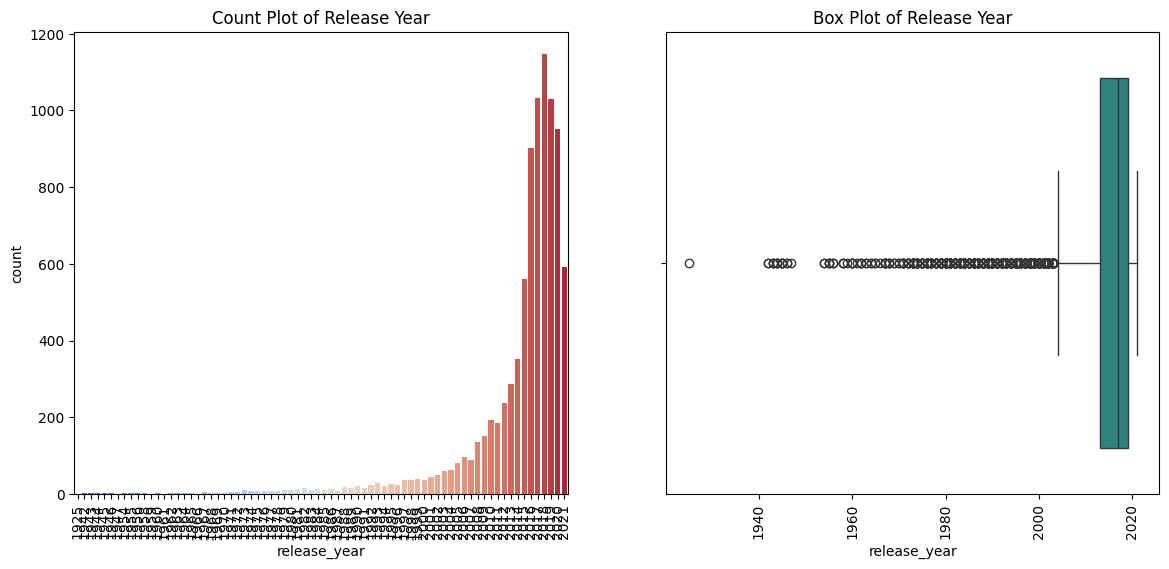

In [ ]:
# 1. Numerical Features Analysis: Univariate
# We will focus on 'release_year' and 'duration' for numerical analysis
plt.figure(figsize=(14, 6))

# Count plot of 'release_year'
plt.subplot(1, 2, 1)
sns.countplot(data=data, x='release_year', palette='coolwarm')
plt.title('Count Plot of Release Year')
plt.xticks(rotation=90)

# Box plot of 'release_year' (Numerical feature)
plt.subplot(1, 2, 2)
sns.boxplot(data=data, x='release_year', palette='viridis')
plt.title('Box Plot of Release Year')
plt.xticks(rotation=90)
plt.show()

<ipython-input-8-2768bf9deee4>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data[~data['duration_mins'].isna()], x='duration_mins', palette='Blues')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: 

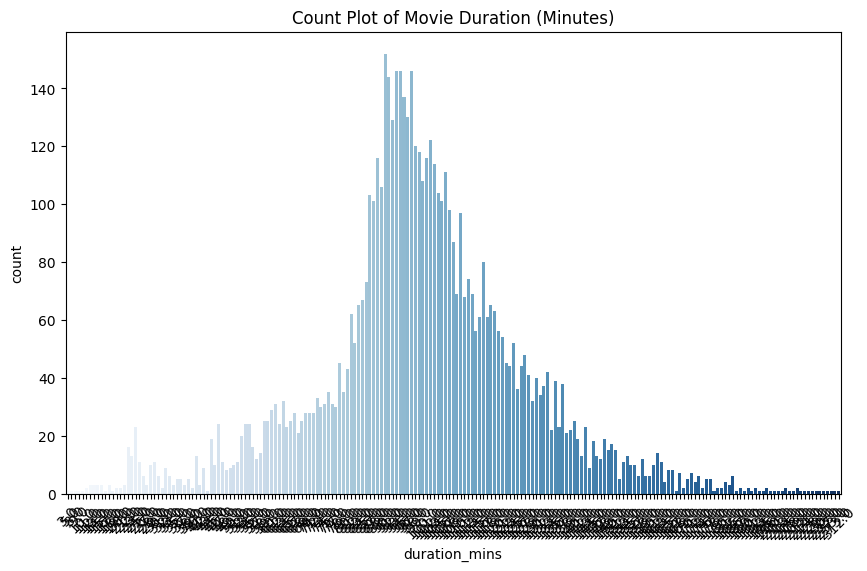

In [ ]:
# For 'duration' (which is mixed in seasons and minutes), we can split it for numerical analysis
data['duration_mins'] = data['duration'].apply(lambda x: int(x.split(' ')[0]) if 'min' in x else None)

# Count plot of 'duration' (TV Shows/Movies duration)
plt.figure(figsize=(10, 6))
sns.countplot(data=data[~data['duration_mins'].isna()], x='duration_mins', palette='Blues')
plt.title('Count Plot of Movie Duration (Minutes)')
plt.xticks(rotation=45)
plt.show()

#  Categorical Features Analysis: Univariate

<ipython-input-9-07e583eed7e9>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='type', palette='Set2')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


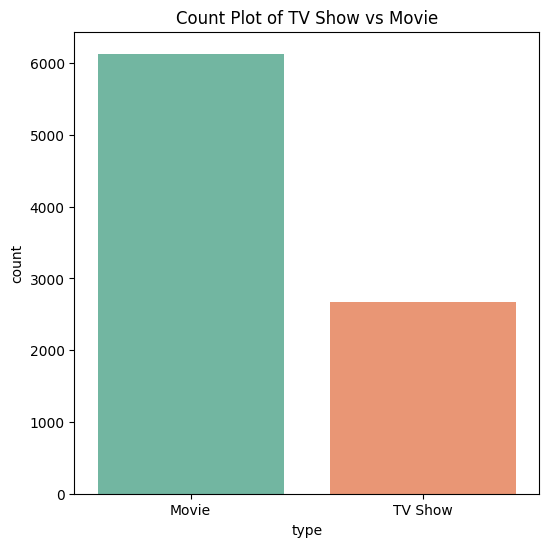

<ipython-input-9-07e583eed7e9>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='rating', palette='coolwarm')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list

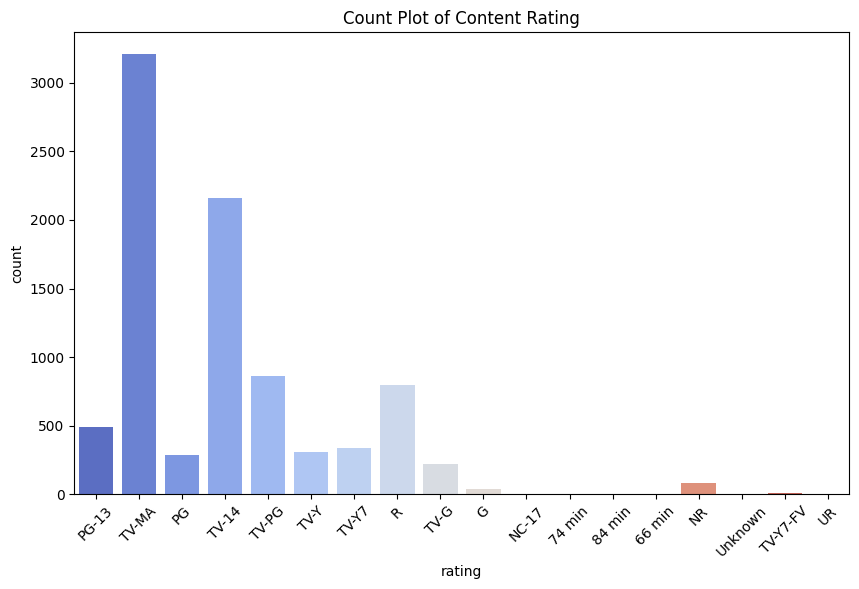

In [ ]:

# Count plot for 'type' (TV Show/Movie)
plt.figure(figsize=(6, 6))
sns.countplot(data=data, x='type', palette='Set2')
plt.title('Count Plot of TV Show vs Movie')
plt.show()

# Box plot of 'rating' (Categorical)
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='rating', palette='coolwarm')
plt.title('Count Plot of Content Rating')
plt.xticks(rotation=45)
plt.show()

# BIVARIATE ANALYSIS

<ipython-input-10-61e3cef3f0d5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='type', y='release_year', data=data, palette='coolwarm')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_grou

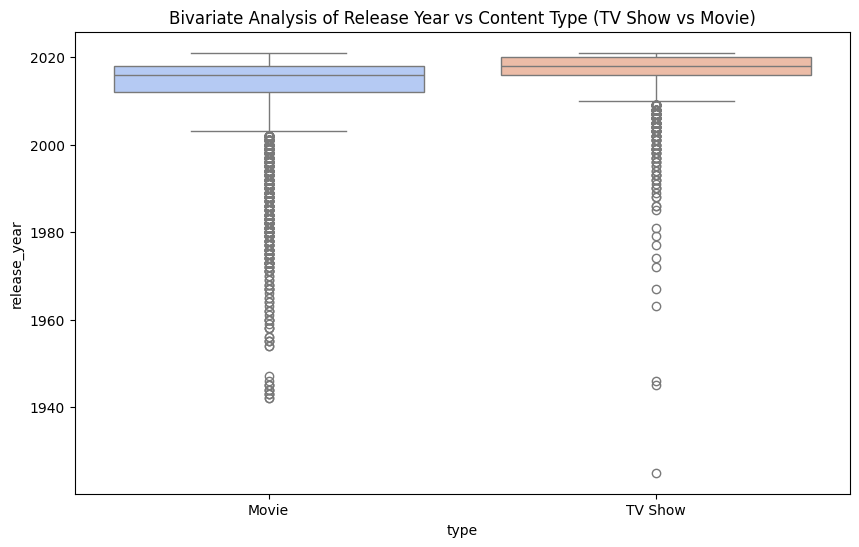

<ipython-input-10-61e3cef3f0d5>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='type', y='duration_mins', data=data, palette='coolwarm')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_gro

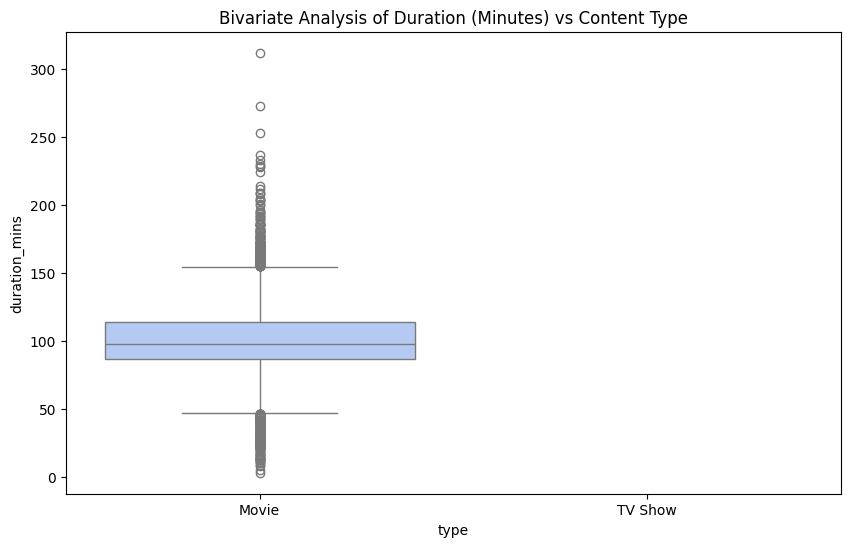

<ipython-input-10-61e3cef3f0d5>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='rating', y='release_year', data=data, palette='Set3')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group

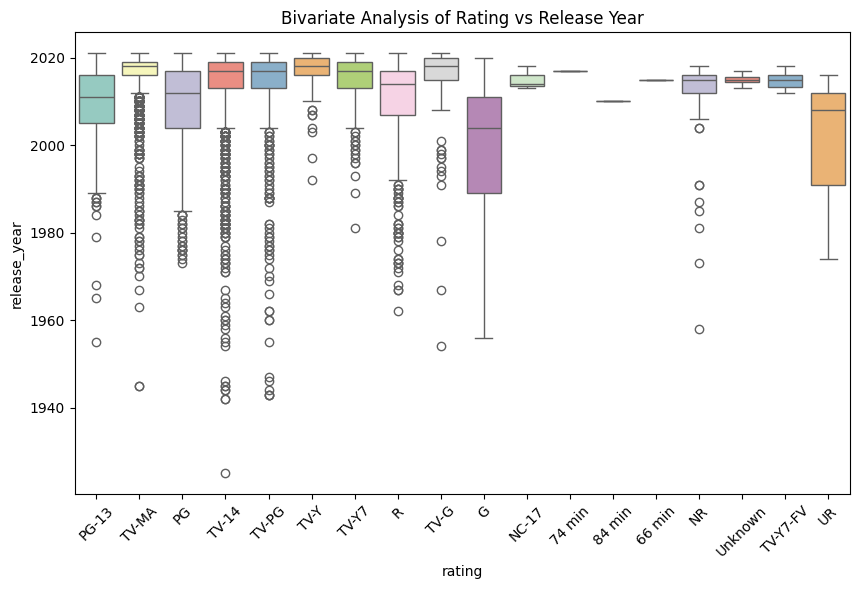

In [ ]:
# Bivariate Analysis: Relationship between 'release_year' and 'type'
plt.figure(figsize=(10, 6))
sns.boxplot(x='type', y='release_year', data=data, palette='coolwarm')
plt.title('Bivariate Analysis of Release Year vs Content Type (TV Show vs Movie)')
plt.show()

# Bivariate Analysis: Relationship between 'duration' and 'type'
plt.figure(figsize=(10, 6))
sns.boxplot(x='type', y='duration_mins', data=data, palette='coolwarm')
plt.title('Bivariate Analysis of Duration (Minutes) vs Content Type')
plt.show()

# Bivariate Analysis: Relationship between 'rating' and 'release_year'
plt.figure(figsize=(10, 6))
sns.boxplot(x='rating', y='release_year', data=data, palette='Set3')
plt.title('Bivariate Analysis of Rating vs Release Year')
plt.xticks(rotation=45)
plt.show()

# MULTI-VARIATE ANALYSIS

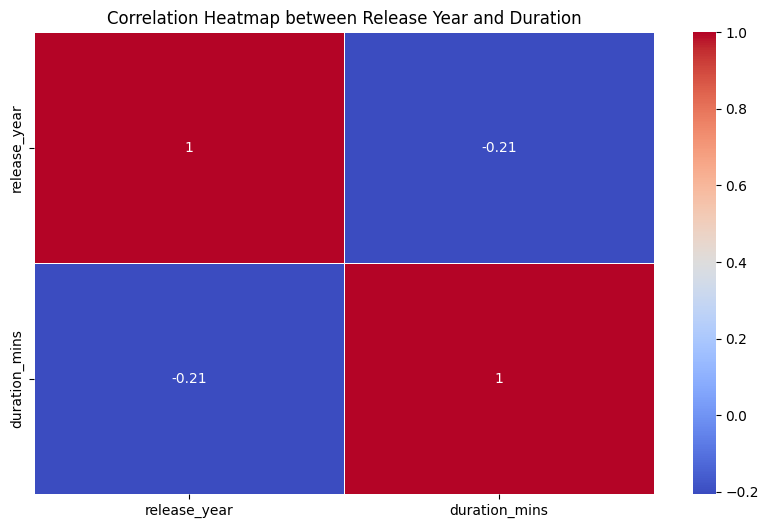

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

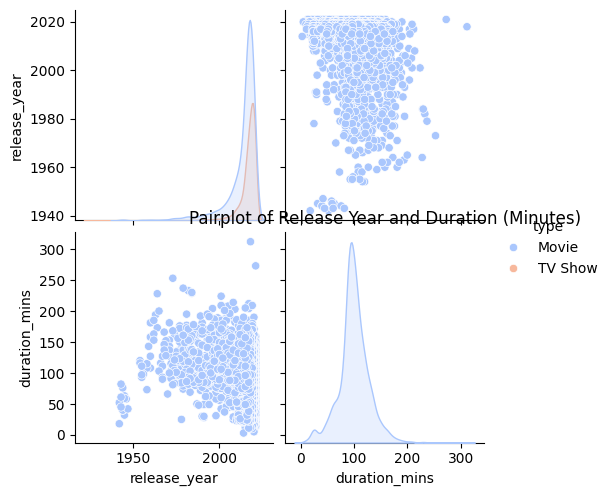

In [ ]:
# Multivariate Analysis: Correlation between release year, duration, and type
data_corr = data[['release_year', 'duration_mins']].corr()

# Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data_corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap between Release Year and Duration')
plt.show()

# Pairplot for multivariate visual analysis
sns.pairplot(data[['release_year', 'duration_mins', 'type']], hue='type', palette='coolwarm')
plt.title('Pairplot of Release Year and Duration (Minutes)')
plt.show()

# Correlation Analysis

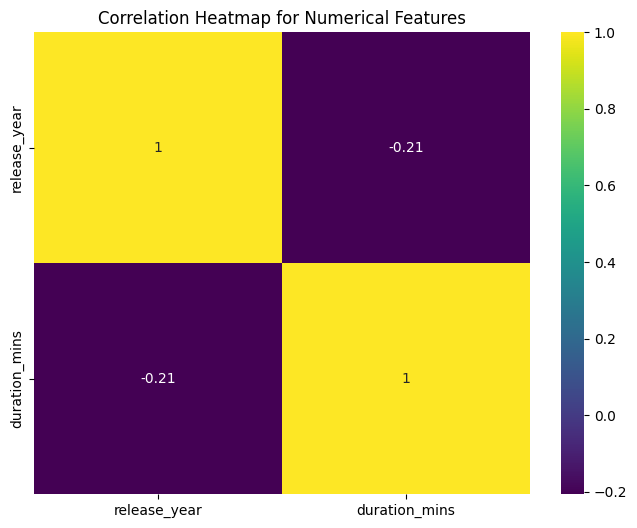

In [ ]:
# Correlation Analysis (For numerical variables: release_year, duration)
correlation = data[['release_year', 'duration_mins']].corr()

# Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='viridis')
plt.title('Correlation Heatmap for Numerical Features')
plt.show()

# HEAT MAPS

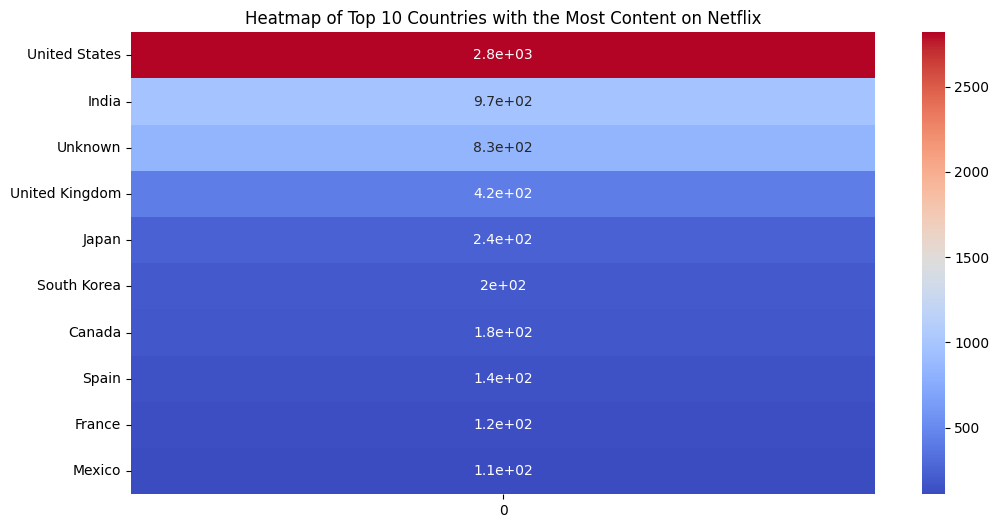

In [ ]:
# Heatmap of the top 10 countries with most content (based on content count)
country_content = data.groupby('country')['show_id'].count().sort_values(ascending=False)
top_10_countries = country_content.head(10)

plt.figure(figsize=(12, 6))
sns.heatmap(top_10_countries.values.reshape(-1, 1), annot=True, cmap='coolwarm', yticklabels=top_10_countries.index)
plt.title('Heatmap of Top 10 Countries with the Most Content on Netflix')
plt.show()

# PAIRPLOT ANALYSIS

<Figure size 1000x600 with 0 Axes>

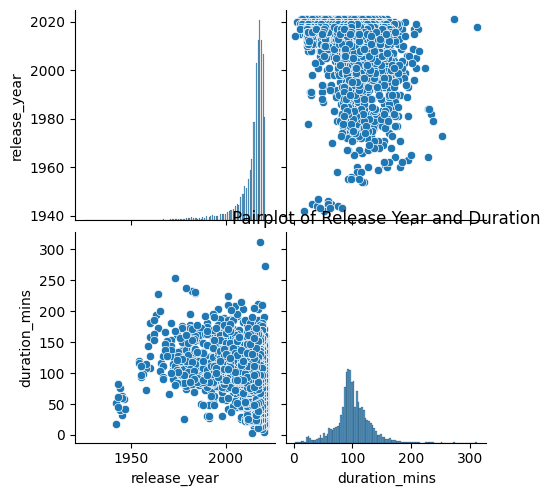

In [ ]:
# Pairplot for numerical variables
plt.figure(figsize=(10, 6))
sns.pairplot(data[['release_year', 'duration_mins']])
plt.title('Pairplot of Release Year and Duration')
plt.show()
